In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path = '/content/Stock_data.csv'
df = pd.read_csv(path)
df

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


Enter the start date (YYYY.MM.DD): 2020.11.01
Enter the end date (YYYY.MM.DD): 2020.12.01


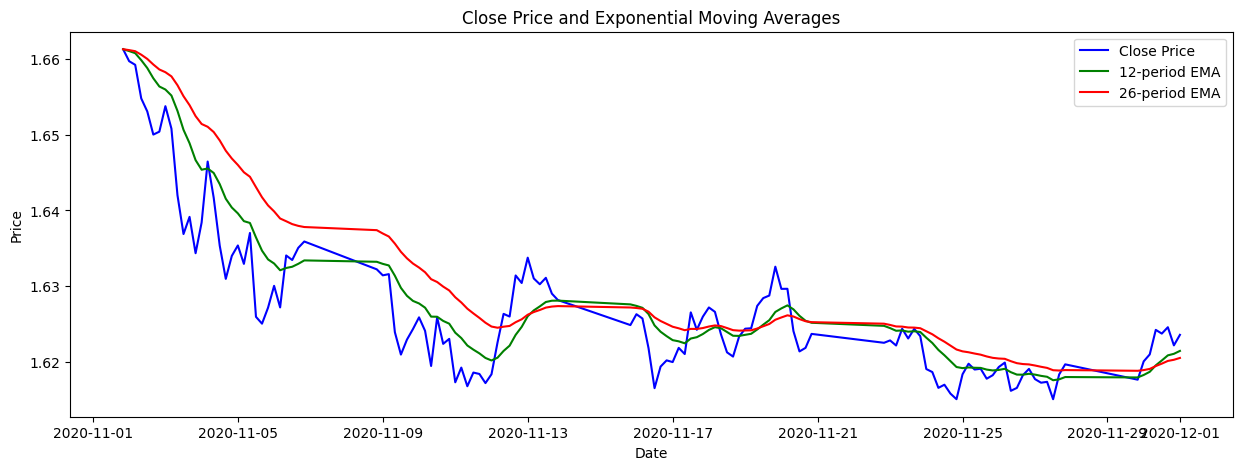

In [ ]:
#1) A 12-period EMA and 26-period EMA are two moving averages.
#Calculate them and plot These two with Close price in a line chart

#first convert date column to date time
df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')

#ask dates to user
start_date = input("Enter the start date (YYYY.MM.DD): ")
end_date = input("Enter the end date (YYYY.MM.DD): ")


# Convert user input to datetime format
start_date = pd.to_datetime(start_date, format='%Y.%m.%d')
end_date = pd.to_datetime(end_date, format='%Y.%m.%d')

# Filter the DataFrame based on user input
user_data = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)].copy()

#calculate 12 peroid and 26 peroid EMA
user_data.loc[:, 'EMA_12'] = user_data['Close'].ewm(span=12, adjust=False).mean()
user_data.loc[:, 'EMA_26'] = user_data['Close'].ewm(span=26, adjust=False).mean()

# Plotting the data
plt.figure(figsize=(15, 5))
plt.plot(user_data['Gmt time'], user_data['Close'], label='Close Price', color='blue')
plt.plot(user_data['Gmt time'], user_data['EMA_12'], label='12-period EMA', color='green')
plt.plot(user_data['Gmt time'], user_data['EMA_26'], label='26-period EMA', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and Exponential Moving Averages')
plt.legend()

# Display the plot
plt.show()


Enter the start date (YYYY.MM.DD): 2020.11.01
Enter the end date (YYYY.MM.DD): 2020.12.01


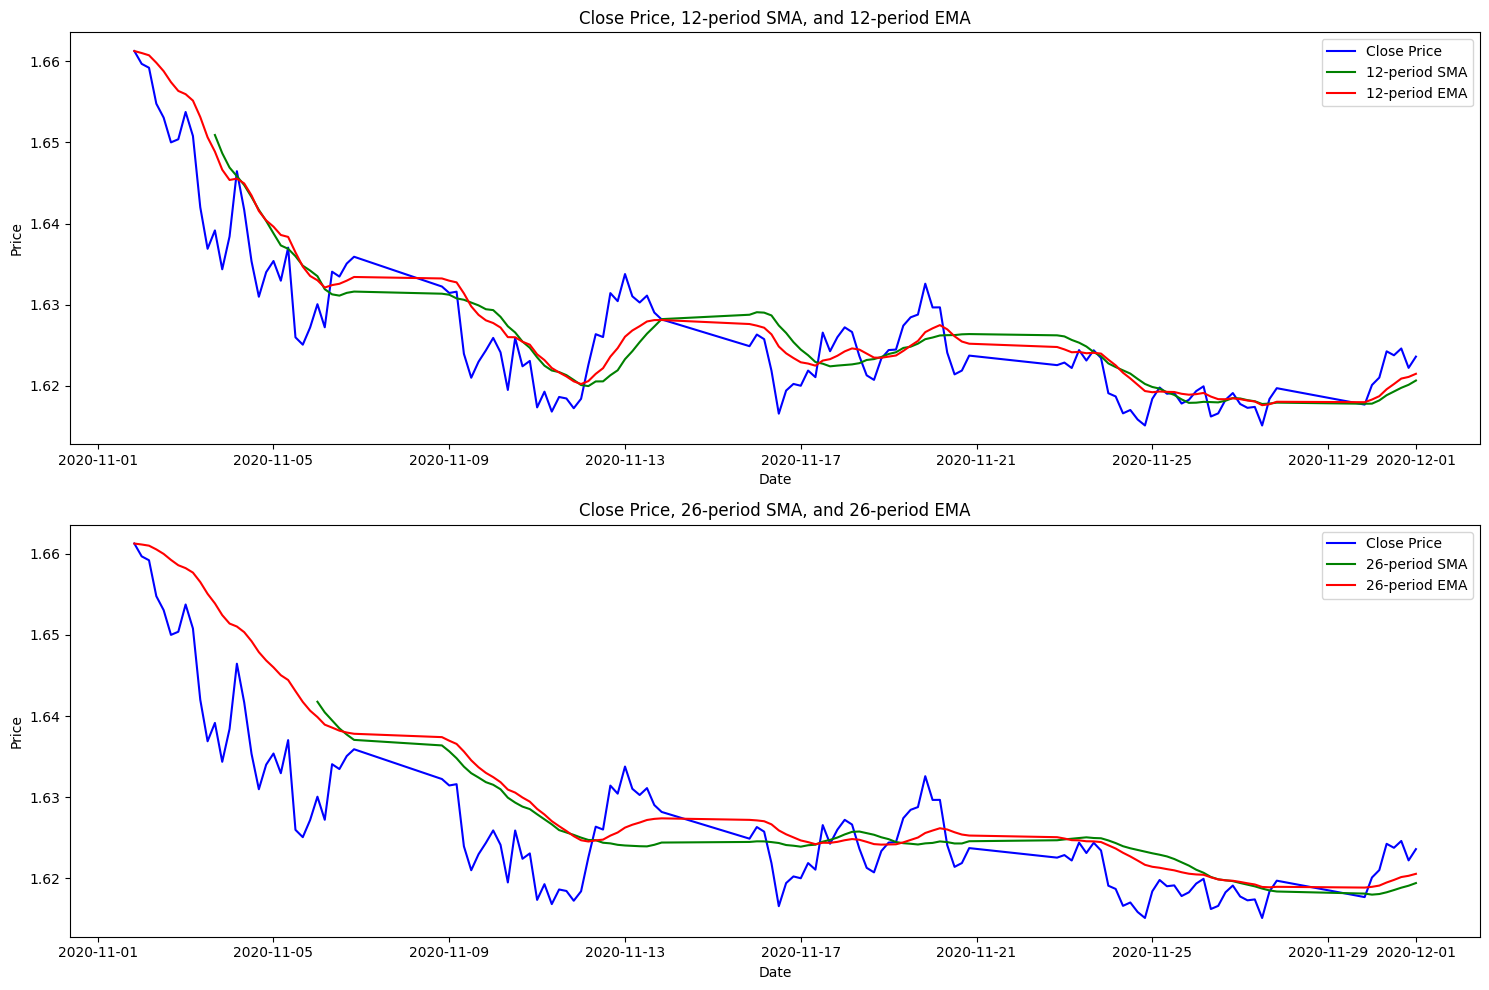

In [ ]:
#2) Ask user for start date and end date between that period calculate. 12-period SMA and 26-period SMA are two moving averages. Calculate them and plot These two with Close price in a line chart
#a)  compare SMA 12 EMA 12 and CLOSE
#b) compare SMA 26 EMA 26 and CLOSE

#first convert date column to date time
df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')

#ask dates to user
start_date = input("Enter the start date (YYYY.MM.DD): ")
end_date = input("Enter the end date (YYYY.MM.DD): ")


# Convert user input to datetime format
start_date = pd.to_datetime(start_date, format='%Y.%m.%d')
end_date = pd.to_datetime(end_date, format='%Y.%m.%d')
# Filter the DataFrame based on user input
user_data = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)].copy()

# Calculate the 12-period SMA and 26-period SMA
user_data['SMA_12'] = user_data['Close'].rolling(window=12).mean()
user_data['SMA_26'] = user_data['Close'].rolling(window=26).mean()

# Calculate the 12-period EMA and 26-period EMA
user_data['EMA_12'] = user_data['Close'].ewm(span=12, adjust=False).mean()
user_data['EMA_26'] = user_data['Close'].ewm(span=26, adjust=False).mean()


# Plotting the data
plt.figure(figsize=(15, 10))

# a) Compare SMA 12, EMA 12, and CLOSE
plt.subplot(2, 1, 1)
plt.plot(user_data['Gmt time'], user_data['Close'], label='Close Price', color='blue')
plt.plot(user_data['Gmt time'], user_data['SMA_12'], label='12-period SMA', color='green')
plt.plot(user_data['Gmt time'], user_data['EMA_12'], label='12-period EMA', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price, 12-period SMA, and 12-period EMA')
plt.legend()

# b) Compare SMA 26, EMA 26, and CLOSE
plt.subplot(2, 1, 2)
plt.plot(user_data['Gmt time'], user_data['Close'], label='Close Price', color='blue')
plt.plot(user_data['Gmt time'], user_data['SMA_26'], label='26-period SMA', color='green')
plt.plot(user_data['Gmt time'], user_data['EMA_26'], label='26-period EMA', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price, 26-period SMA, and 26-period EMA')
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


Enter the start date (YYYY.MM.DD): 2020.11.01
Enter the end date (YYYY.MM.DD): 2020.12.01


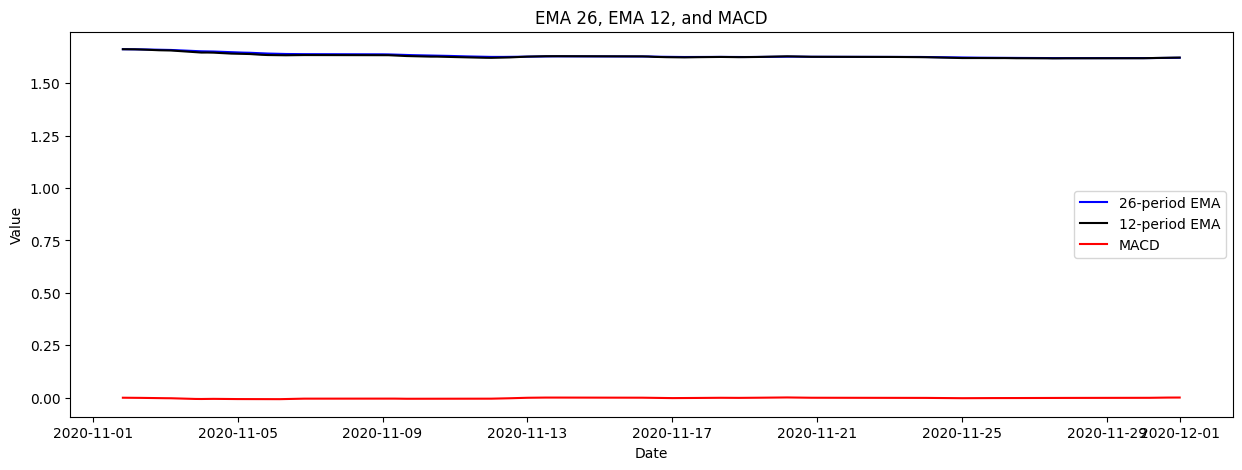

In [ ]:
#3) calculate MACD between EMA 26 and EMA 12 Plot line chart showing EMA 26 and EMA 12 and MACD

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named df

# Step 1: Convert 'Gmt time' column to datetime format
df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y')

# Step 2: Ask user for start and end dates
start_date = input("Enter the start date (YYYY.MM.DD): ")
end_date = input("Enter the end date (YYYY.MM.DD): ")

# Step 3: Convert user input to datetime format
start_date = pd.to_datetime(start_date, format='%Y.%m.%d')
end_date = pd.to_datetime(end_date, format='%Y.%m.%d')

# Step 4: Filter data for the specified date range
df_filter = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)].copy()

# Step 5: Calculate the 12-period EMA and 26-period EMA
df_filter.loc[:, 'EMA_12'] = df_filter['Close'].ewm(span=12, adjust=False).mean()
df_filter.loc[:, 'EMA_26'] = df_filter['Close'].ewm(span=26, adjust=False).mean()

# Step 6: Calculate MACD
df_filter.loc[:, 'MACD'] = df_filter['EMA_12'] - df_filter['EMA_26']

# Step 7: Plotting the data
plt.figure(figsize=(15, 5))

# Plot EMA 26, EMA 12, and MACD
plt.plot(df_filter['Gmt time'], df_filter['EMA_26'], label='26-period EMA', color='blue')
plt.plot(df_filter['Gmt time'], df_filter['EMA_12'], label='12-period EMA', color='black')
plt.plot(df_filter['Gmt time'], df_filter['MACD'], label='MACD', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('EMA 26, EMA 12, and MACD')
plt.legend()

# Display the plot
plt.show()


In [ ]:
#4. Calculate RSI,

In [ ]:

# Step 1: Calculate daily price changes
df['delta'] = df['Close'].diff()

# Step 2: Separate gains and losses
df['gain'] = 0
df['loss'] = 0

for i in range(1, len(df)):
    if df.loc[i, 'delta'] > 0:
        df.loc[i, 'gain'] = df.loc[i, 'delta']
    else:
        df.loc[i, 'loss'] = -df.loc[i, 'delta']

# Step 3: Calculate average gains and losses over 12 and 26 days
period_12 = 12
period_26 = 26

df['avg_gain_12'] = df['gain'].rolling(window=period_12).mean()
df['avg_loss_12'] = df['loss'].rolling(window=period_12).mean()

df['avg_gain_26'] = df['gain'].rolling(window=period_26).mean()
df['avg_loss_26'] = df['loss'].rolling(window=period_26).mean()

# Step 4: Calculate RS
df['RS_12'] = df['avg_gain_12'] / df['avg_loss_12']
df['RS_26'] = df['avg_gain_26'] / df['avg_loss_26']

# Step 5: Calculate RSI
df['RSI_12'] = 100 - (100 / (1 + df['RS_12']))
df['RSI_26'] = 100 - (100 / (1 + df['RS_26']))

# Display the RSI values
print(df[['Gmt time', 'Close', 'RSI_12', 'RSI_26']].tail())

                 Gmt time     Close     RSI_12     RSI_26
12885 2020-12-11 04:00:00  1.605455  19.563781  30.926077
12886 2020-12-11 08:00:00  1.609935  34.854041  33.755244
12887 2020-12-11 12:00:00  1.606745  32.428006  31.989615
12888 2020-12-11 16:00:00  1.607315  25.960820  27.002053
12889 2020-12-11 20:00:00  1.607785  23.795598  31.490284


Enter the start date (YYYY.MM.DD): 2020.11.01
Enter the end date (YYYY.MM.DD): 2020.12.01


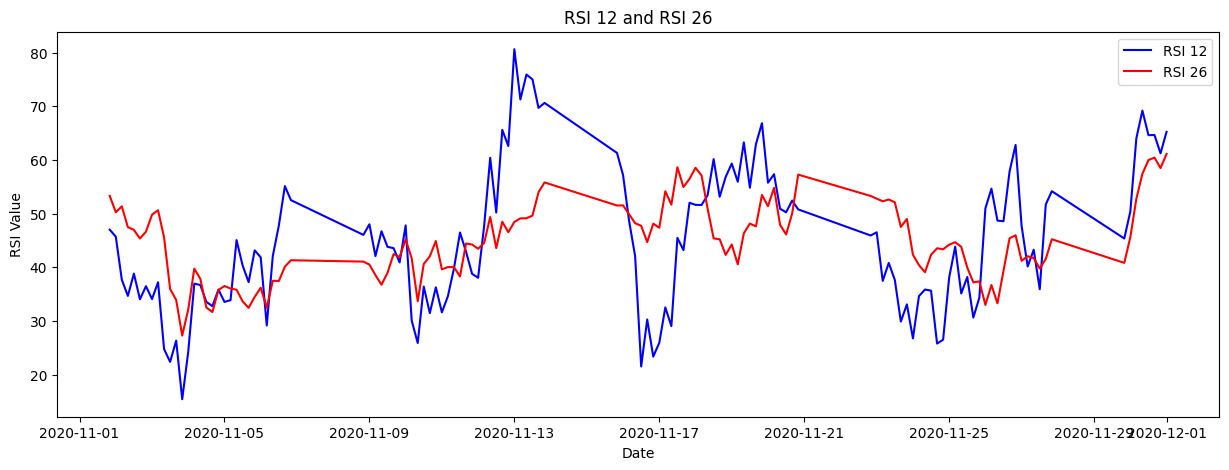

In [ ]:
# Step 1: Convert 'Gmt time' column to datetime format
df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y')

# Step 2: Ask user for start and end dates
start_date = input("Enter the start date (YYYY.MM.DD): ")
end_date = input("Enter the end date (YYYY.MM.DD): ")

# Step 3: Convert user input to datetime format
start_date = pd.to_datetime(start_date, format='%Y.%m.%d')
end_date = pd.to_datetime(end_date, format='%Y.%m.%d')

# Step 4: Filter data for the specified date range
df_filtered = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)].copy()

# Plotting the RSI values
plt.figure(figsize=(15, 5))

# Plot RSI 12 and RSI 26
plt.plot(df_filtered['Gmt time'], df_filtered['RSI_12'], label='RSI 12', color='blue')
plt.plot(df_filtered['Gmt time'], df_filtered['RSI_26'], label='RSI 26', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.title('RSI 12 and RSI 26')
plt.legend()

# Display the plot
plt.show()

In [ ]:
#5. Bollinger bands

Enter the start date (YYYY.MM.DD): 2020.11.01
Enter the end date (YYYY.MM.DD): 2020.12.01


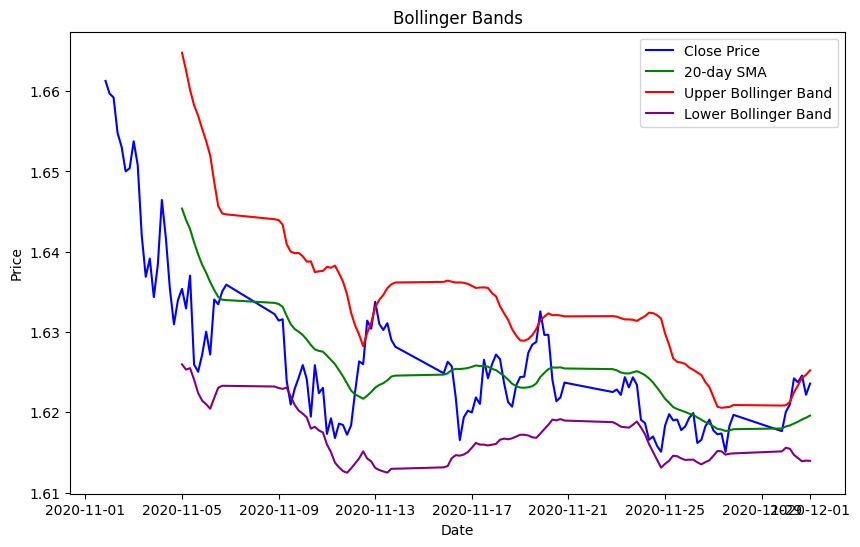

In [ ]:

# Step 1: Convert date column to datetime
df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y')

# Step 2: Ask dates to user
start_date = input("Enter the start date (YYYY.MM.DD): ")
end_date = input("Enter the end date (YYYY.MM.DD): ")

# Step 3: Convert user input to datetime format
start_date = pd.to_datetime(start_date, format='%Y.%m.%d')
end_date = pd.to_datetime(end_date, format='%Y.%m.%d')

# Step 4: Filter data for the specified date range
df_filtered = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)].copy()  # Make a copy

# Step 5: Calculate Bollinger Bands
period = 20
df_filtered['SMA'] = df_filtered['Close'].rolling(window=period).mean()
df_filtered['std_dev'] = df_filtered['Close'].rolling(window=period).std()
df_filtered['upper_band'] = df_filtered['SMA'] + (df_filtered['std_dev'] * 2)
df_filtered['lower_band'] = df_filtered['SMA'] - (df_filtered['std_dev'] * 2)

# Step 6: Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Gmt time'], df_filtered['Close'], label='Close Price', color='blue')
plt.plot(df_filtered['Gmt time'], df_filtered['SMA'], label='20-day SMA', color='green')
plt.plot(df_filtered['Gmt time'], df_filtered['upper_band'], label='Upper Bollinger Band', color='red')
plt.plot(df_filtered['Gmt time'], df_filtered['lower_band'], label='Lower Bollinger Band', color='purple')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.show()


In [ ]:
#6. ADX

In [ ]:
# Step 1: Calculate True Range (TR), +DM, and -DM
df['High-Low'] = df['High'] - df['Low']
df['High-Close_prev'] = abs(df['High'] - df['Close'].shift(1))
df['Low-Close_prev'] = abs(df['Low'] - df['Close'].shift(1))

df['TR'] = df[['High-Low', 'High-Close_prev', 'Low-Close_prev']].max(axis=1)

# Step 2: Calculate +DM and -DM
df['+DM'] = 0
df['-DM'] = 0

for i in range(1, len(df)):
    if df.loc[i, 'High'] > df.loc[i-1, 'High']:
        df.loc[i, '+DM'] = df.loc[i, 'High'] - df.loc[i-1, 'High']
    elif df.loc[i, 'Low'] < df.loc[i-1, 'Low']:
        df.loc[i, '-DM'] = df.loc[i-1, 'Low'] - df.loc[i, 'Low']

# Step 3: Calculate Average True Range (ATR)
period = 14
df['ATR'] = df['TR'].rolling(window=period).mean()

# Step 4: Calculate +DM_smoothed and -DM_smoothed
df['+DM_smoothed'] = df['+DM'].rolling(window=period).mean()
df['-DM_smoothed'] = df['-DM'].rolling(window=period).mean()

# Step 5: Calculate +DI and -DI
df['+DI'] = (df['+DM_smoothed'] / df['ATR']) * 100
df['-DI'] = (df['-DM_smoothed'] / df['ATR']) * 100

# Step 6: Calculate DX
df['DX'] = (abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])) * 100

# Step 7: Calculate ADX
df['ADX'] = df['DX'].rolling(window=period).mean()


Enter the start date (YYYY.MM.DD): 2020.11.01
Enter the end date (YYYY.MM.DD): 2020.12.01


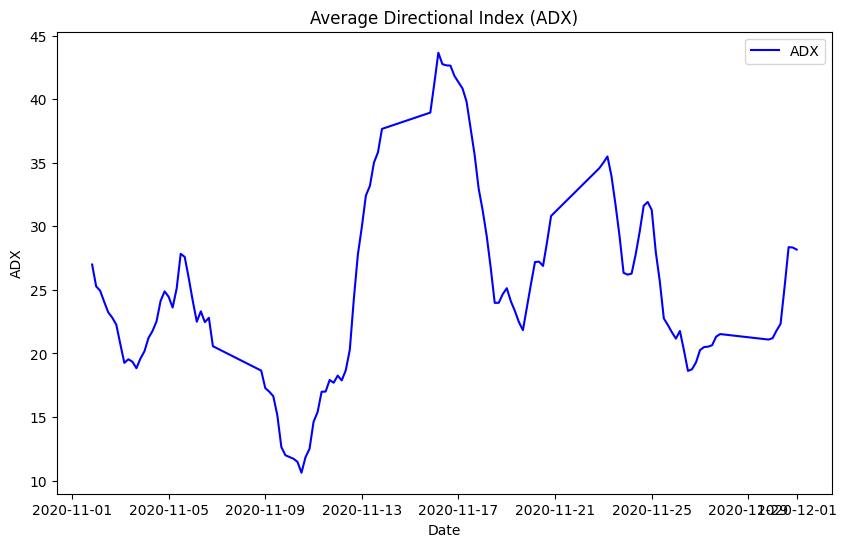

In [ ]:
# Plotting

#first convert date column to date time
df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y')

#ask dates to user
start_date = input("Enter the start date (YYYY.MM.DD): ")
end_date = input("Enter the end date (YYYY.MM.DD): ")


# Convert user input to datetime format
start_date = pd.to_datetime(start_date, format='%Y.%m.%d')
end_date = pd.to_datetime(end_date, format='%Y.%m.%d')

# Filter data for the specified date range
df_filtered = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Gmt time'], df_filtered['ADX'], label='ADX', color='blue')

plt.xlabel('Date')
plt.ylabel('ADX')
plt.title('Average Directional Index (ADX)')
plt.legend()
plt.show()


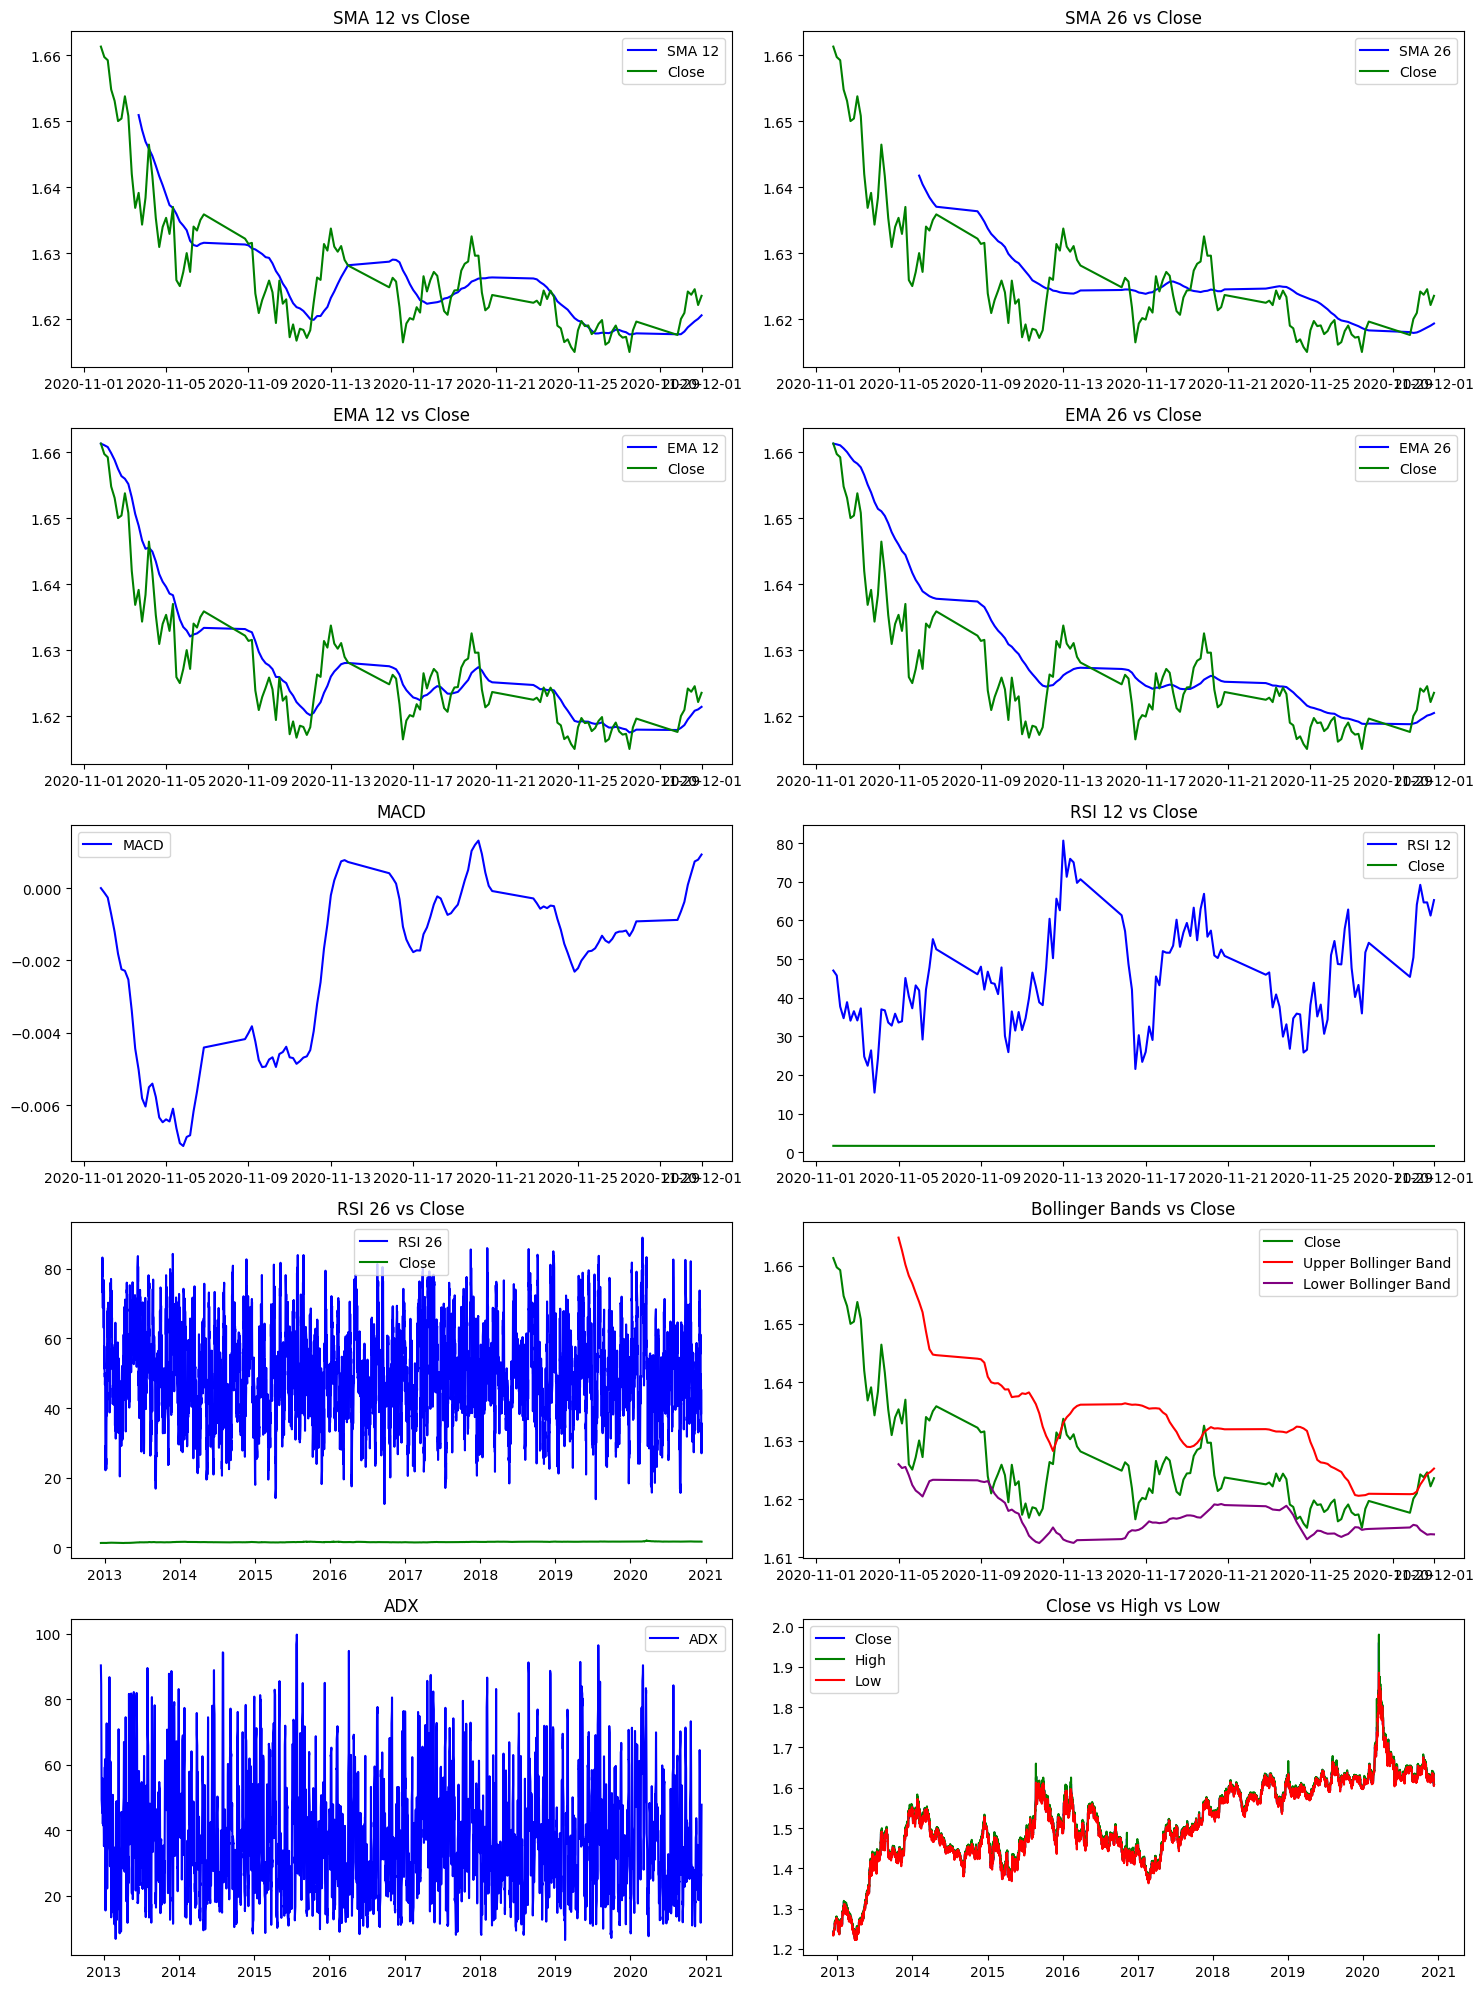

In [ ]:


# Create subplots
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

# Subplot 1: SMA 12 vs close
axs[0, 0].plot(user_data['Gmt time'], user_data['SMA_12'], label='SMA 12', color='blue')
axs[0, 0].plot(user_data['Gmt time'], user_data['Close'], label='Close', color='green')
axs[0, 0].set_title('SMA 12 vs Close')
axs[0, 0].legend()

# Subplot 2: SMA 26 vs close
axs[0, 1].plot(user_data['Gmt time'], user_data['SMA_26'], label='SMA 26', color='blue')
axs[0, 1].plot(user_data['Gmt time'], user_data['Close'], label='Close', color='green')
axs[0, 1].set_title('SMA 26 vs Close')
axs[0, 1].legend()

# Subplot 3: EMA 12 vs close
axs[1, 0].plot(user_data['Gmt time'], user_data['EMA_12'], label='EMA 12', color='blue')
axs[1, 0].plot(user_data['Gmt time'], user_data['Close'], label='Close', color='green')
axs[1, 0].set_title('EMA 12 vs Close')
axs[1, 0].legend()

# Subplot 4: EMA 26 vs close
axs[1, 1].plot(user_data['Gmt time'], user_data['EMA_26'], label='EMA 26', color='blue')
axs[1, 1].plot(user_data['Gmt time'], user_data['Close'], label='Close', color='green')
axs[1, 1].set_title('EMA 26 vs Close')
axs[1, 1].legend()

# Subplot 5: MACD
axs[2, 0].plot(df_filter['Gmt time'], df_filter['MACD'], label='MACD', color='blue')
axs[2, 0].set_title('MACD')
axs[2, 0].legend()

# Subplot 6: RSI 12 vs close
axs[2, 1].plot(df_filtered['Gmt time'], df_filtered['RSI_12'], label='RSI 12', color='blue')
axs[2, 1].plot(df_filtered['Gmt time'], df_filtered['Close'], label='Close', color='green')
axs[2, 1].set_title('RSI 12 vs Close')
axs[2, 1].legend()

# Subplot 7: RSI 26 vs close
axs[3, 0].plot(df['Gmt time'], df['RSI_26'], label='RSI 26', color='blue')
axs[3, 0].plot(df['Gmt time'], df['Close'], label='Close', color='green')
axs[3, 0].set_title('RSI 26 vs Close')
axs[3, 0].legend()

# Subplot 8: Bollinger Bands vs close
axs[3, 1].plot(df_filtered['Gmt time'], df_filtered['Close'], label='Close', color='green')
axs[3, 1].plot(df_filtered['Gmt time'], df_filtered['upper_band'], label='Upper Bollinger Band', color='red')
axs[3, 1].plot(df_filtered['Gmt time'], df_filtered['lower_band'], label='Lower Bollinger Band', color='purple')
axs[3, 1].set_title('Bollinger Bands vs Close')
axs[3, 1].legend()

# Subplot 9: ADX
axs[4, 0].plot(df['Gmt time'], df['ADX'], label='ADX', color='blue')
axs[4, 0].set_title('ADX')
axs[4, 0].legend()

# Subplot 10: Close vs High vs Low
axs[4, 1].plot(df['Gmt time'], df['Close'], label='Close', color='blue')
axs[4, 1].plot(df['Gmt time'], df['High'], label='High', color='green')
axs[4, 1].plot(df['Gmt time'], df['Low'], label='Low', color='red')
axs[4, 1].set_title('Close vs High vs Low')
axs[4, 1].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
